# DB Analysis
## With a few hundred papers in the DB, some experiments can be done on the data.


### 1. Connecting to the DB

In [1]:
import mariadb
import json

In [2]:
with open('../credentials.json', 'r') as crd_json_fd:
    json_text = crd_json_fd.read()
    json_obj = json.loads(json_text)

In [3]:
credentials = json_obj["Credentials"]
username = credentials["username"]
password = credentials["password"]

In [4]:
table_name = "publications"
db_name = "ubbcluj"

In [5]:
mariadb_connection = mariadb.connect(user=username, password=password, database=db_name)
mariadb_cursor = mariadb_connection.cursor()

### 2. Counting publications.

In [6]:
queryString = "SELECT COUNT(*) FROM "
queryString += table_name

In [7]:
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)


In [8]:
for item in mariadb_cursor:
    count = item[0]
    print("Number of publications: {0}".format(count))
    

Number of publications: 846


### 3. Distinct Affiliations

In [9]:
queryString = "SELECT Affiliations, COUNT(*) AS c FROM publications GROUP BY Affiliations ORDER BY c DESC"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

affiliations = []
for item in mariadb_cursor:
    Affiliation = item[0]
    affiliations.append(item[0])
    c = item[1]
    print("{0} : {1} occurences".format(Affiliation, c))

 : 292 occurences
Studia Universitatis "Babes-Bolyai" : 21 occurences
Studia Universitas Babes-Bolyai : 13 occurences
International Journal of Computers : 9 occurences
Studia Universitatis Babeș-Bolyai Series Informatica : 8 occurences
Proceedings of the Symposium Colocviul Academic Clujean de INFORMATICA : 6 occurences
Knowledge Engineering: Principles and Techniques : 5 occurences
Zilele Academice Clujene (ZAC) : 5 occurences
Studies in Informatics and Control : 4 occurences
Studia Universitatis Babes- : 4 occurences
The International Journal of Information Technology and Intelligent Computing : 3 occurences
The Genetic and Evolutionary Computation Conference : 3 occurences
Editura Albastră : 3 occurences
V. Niculescu : 3 occurences
Proceedings of the Symposium "Zilele Academice Clujene" : 3 occurences
organized by  “Babeş-Bolyai”  University  Cluj-Napoca : 3 occurences
International Journal on Artificial Intelligence Tools (IJAIT) : 2 occurences
Applied Soft Computing : 2 occurences

In [10]:
for i in affiliations:
    if "conference" in [k.lower() for k in i.split()]:
        print(i)

The Genetic and Evolutionary Computation Conference
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics
the 2016 IEEE 12th International Conference on Intelligent Computer Communication and Processing
2008 IEEE-TTTC International Conference on Automation
The 25th International Conference on Software, Telecommunications and Computer Networks (SoftCOM)
International Conference on Next Generation Web Services Practices (NWeSP)
2nd International Conference on Intelligent Computer Communication and Processing (ICCP)
rd Balkan Conference in Informatics
The 19th International Conference on Artificial Intelligence and Soft Computing 
GECCO 2019 (Proceedings of the Genetic and Evolutionary Computation Conference Companion
KES 2019 (Proceedings of the 23rd International Conference on Knowledge-Based and Intelligent Information Engineering Systems
ICSOFT 2019 (The 14th International Conference on Software Technologies (ICSOFT 2019)
SEKE 2019 (Proc. of the 31st Interna

In [11]:
for i in affiliations:
    if "journal" in [k.lower() for k in i.split()]:
        print(i)

International Journal of Computers
The International Journal of Information Technology and Intelligent Computing
International Journal on Artificial Intelligence Tools (IJAIT)
Journal of chemical information and computer sciences 40 (4), 1052-1061
INFOCOMP Journal of Computer Science
Journal of Artificial Evolution and Applications
Journal of chemical information and computer sciences 42 (6), 1363-1369
Journal of chemical information and computer sciences 36 (3), 465-482
Journal of chemical information and computer sciences 37 (3), 510-516
Journal of chemical information and computer sciences 36 (6), 1098-1108
Journal of chemical information and computer sciences 35 (5), 851-857
International Journal of Computer Information Systems and Industrial …
International Journal of Innovative Computing Information and Control
International Journal of Innovative Computing
Journal of Systems and Software
IJCSNS International Journal of Computer Science and Network Security
IJCTA - International J

In [12]:
tokens = []
for i in affiliations:
    words = i.split()
    for word in words:
        tokens.append(word)
tokens

['Studia',
 'Universitatis',
 '"Babes-Bolyai"',
 'Studia',
 'Universitas',
 'Babes-Bolyai',
 'International',
 'Journal',
 'of',
 'Computers',
 'Studia',
 'Universitatis',
 'Babeș-Bolyai',
 'Series',
 'Informatica',
 'Proceedings',
 'of',
 'the',
 'Symposium',
 'Colocviul',
 'Academic',
 'Clujean',
 'de',
 'INFORMATICA',
 'Knowledge',
 'Engineering:',
 'Principles',
 'and',
 'Techniques',
 'Zilele',
 'Academice',
 'Clujene',
 '(ZAC)',
 'Studies',
 'in',
 'Informatics',
 'and',
 'Control',
 'Studia',
 'Universitatis',
 'Babes-',
 'The',
 'International',
 'Journal',
 'of',
 'Information',
 'Technology',
 'and',
 'Intelligent',
 'Computing',
 'The',
 'Genetic',
 'and',
 'Evolutionary',
 'Computation',
 'Conference',
 'Editura',
 'Albastră',
 'V.',
 'Niculescu',
 'Proceedings',
 'of',
 'the',
 'Symposium',
 '"Zilele',
 'Academice',
 'Clujene"',
 'organized',
 'by',
 '“Babeş-Bolyai”',
 'University',
 'Cluj-Napoca',
 'International',
 'Journal',
 'on',
 'Artificial',
 'Intelligence',
 'Tool

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


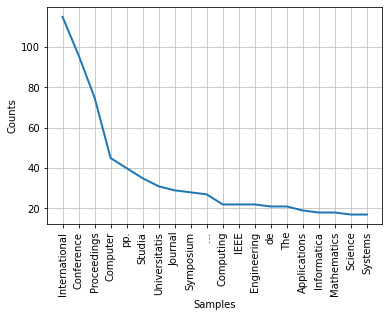

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    #print(str(key) + ':' + str(val))
    pass
freq.plot(20, cumulative=False)

In [81]:
# Histogram of professors publication number
queryString = "SELECT (Select FullName from humanoid_entities where id = ProfessorId), ProfessorId, COUNT(Title) FROM publications GROUP BY ProfessorId ORDER BY COUNT(Title) desc"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

name_dict = {}
tup_list = []
max_id = 0
for item in mariadb_cursor:
    ProfName = item[0]
    ProfId = item[1]
    max_id = max(max_id, ProfId)
    Count = item[2]
    tup_list.append((ProfName, ProfId, Count))
    name_dict[ProfId] = ProfName
    

    

[('Dr. CHIRA Camelia', 9, 126), ('Dr. POP F. Horia', 5, 112), ('Dr. NICULESCU Virginia', 14, 106), ('Dr. DIOSAN Laura', 4, 94), ('Dr. CZIBULA Istvan', 3, 86), ('Dr. DARABANT Sergiu Adrian', 12, 53), ('Dr. AVRAM Sanda', 6, 45), ('Dr. COJOCAR Grigoreta', 10, 39), ('Dr. CHISALITA-CRETU Camelia', 21, 38), ('Dr. VESCAN Andreea', 17, 35), ('Dr. BOCICOR Maria Iuliana', 7, 32), ('Dr. BUFNEA Darius', 20, 31), ('Dr. BENȚA Iulian', 18, 30), ('Dr. MOTOGNA Simona', 13, 19)]


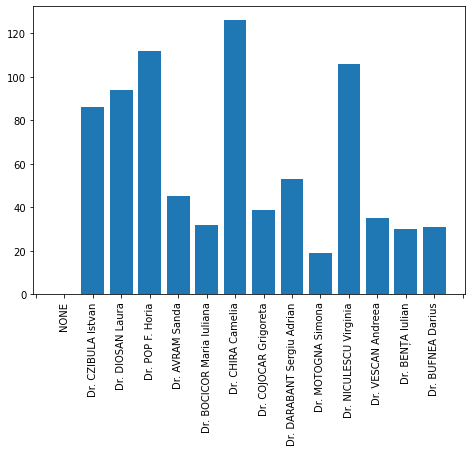

In [88]:
import pandas as pd
print(tup_list)
final_list = []
for i in range(max_id):
    found_id = False
    found_value = 0
    for k in tup_list:
        if i == k[1]:
            found_id = True
            found_value = k[2]
            break
    if not found_id:
        name_dict[i] = "NONE"
    final_list.append((i, found_value))
    
fa = pd.DataFrame([k[1] for k in final_list])

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar([name_dict[k[0]] for k in final_list], [k[1] for k in final_list])
loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=90)
plt.show()

### 3. TF-IDF and K-Means?


### 3. Distinct Affiliations

In [14]:
queryString = "SELECT Title FROM publications"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

titles = []
for item in mariadb_cursor:
    Title = item[0]
    titles.append(item[0])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
corpus = titles[:]
corpus

['A Comparative Study of Software Architectures in Mobile Applications',
 'The Use of Simple Cellular Automata in Image Processing',
 'Support Vector Machine and Boosting based Multiclass Classification for Traffic Scene Obstacles',
 'Obstacle Recognition in Traffic by Adapting the HOG Descriptor and Learning in Layers',
 'Descriptors fusion and genetic programming for breast cancer detection',
 'Multi-objective breast cancer classification by using Multi-Expression Programming',
 'Pedestrian Recognition by Using Kernel Descriptors',
 'Improving classification performance of Support Vector Machine by genetically optimisation of kernel shape and hyper-parameters',
 'How the Kernels Can Influence Image Classification Performance',
 'Alignment of Custom Standards by Machine Learning Algorithms',
 'Model Alignment by Using the Concept Definition',
 'Evolutionary design of Evolutionary Algorithms',
 'Genetic Programming with linear representation – a survey',
 'An autonomous GP-based system

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [18]:
print(vectorizer.get_feature_names())

['00447', '05', '09', '10', '101', '105', '10th', '110', '11th', '12', '120', '125', '128', '13', '131', '15', '1582', '15th', '163', '16th', '17th', '183', '187', '18th', '195', '1985', '1994', '1996', '1999', '19th', '2001', '2002', '2003', '2004', '2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2066', '207', '20th', '217', '222', '23th', '24', '253', '254', '257', '264', '27', '273', '27th', '2d', '2nd', '34', '35', '38', '3d', '42', '456', '463', '465', '4711', '474', '485', '486', '4th', '5329', '5597', '5768', '6th', '76', '775', '782', '7th', '80', '88', '89', '8th', '91', '93', '95', '9648', 'abordare', 'abordari', 'about', 'abs', 'abstract', 'abstractness', 'academic', 'academice', 'academiceclujene', 'accelerate', 'acceleration', 'accelerometer', 'access', 'accessibility', 'according', 'accurate', 'acivs', 'acknowledgement', 'acm', 'aco', 'acquired', 'acrylonitrile', 'acta', 'action', 'active', 'activita

In [19]:
print(X.shape)

(846, 1778)


In [20]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
for k in X.toarray():
    for j in k:
        if j > 1:
            print(j)

2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2


In [22]:
import pandas as pd

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,00447,05,09,10,101,105,10th,110,11th,12,...,xml,year,your,zilele,zsuzsanna,évolutive,în,şabloanele,şi,ştiinţifice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,'inteligenta,09,1,10,10th,11th,12-13,120-131,125-128,13-15,...,évolut,în,şi,ştiinţific,β-x,–,’,“,”,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(corpus)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())


c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv

In [26]:
for word in df.columns:
    for row in df[word]:
        if row != 0.0:
            print(word, row)

'inteligenta 0.38414629029605124
09 0.36584399807342033
1 0.4821331537174356
1 0.2586338687792387
1 0.2688236667943681
1 0.2663938635837962
1 0.25207413090956854
10 0.5181218561323687
10 0.5980552022654959
10th 0.31474109019067126
10th 0.5865360698464798
11th 0.2858779400816324
11th 0.42335891082551763
12-13 0.4491988900724893
120-131 0.42891568792934015
125-128 0.32731012511756336
13-15 0.5084913698311617
1582-5329 0.31555818021502774
1582-5329 0.32196810540407694
15th 0.2745568591645623
15th 0.25979833291992377
15th 0.3615827442167019
15th 0.37790940471904333
163-187 0.4026620805857277
16th 0.2847241695778246
16th 0.40191737134588795
17th 0.32230791994107993
17th 0.44218074272240443
183-195 0.3122562181048324
18th 0.3569839654352272
1985–1996 0.3058782731300489
1994.an 0.41584494236602837
1999 0.2751193549917436
1999-molecular 0.2751193549917436
19th 0.23756256160541647
19th 0.4223929929251252
2 0.2942938090831524
2 0.3614977039533514
2-4 0.3431040795645276
2001 0.44595375303701945
2

autonoma 0.4477243590259935
autonomi 0.3965965266746701
avec 0.36712218660288415
avenu 0.5801786800356248
awar 0.32986729231636225
awar 0.48485377939607477
awar 0.5177260910747666
babes-bolyai 0.33243497726264487
babes-bolyai 0.338521933266862
babes-bolyai 0.32854467910439256
babes-bolyai 0.35423063797520316
babes-bolyai 0.38277977167593613
babeş-bolyai 0.48193598221633477
babeş-bolyai 0.3232713652770533
babeş-bolyai 0.40187419115521983
babeș-bolyai 0.40181237954522897
babeș-bolyai 0.3883174690126754
bacteri 0.3478264855902683
bait 0.46203868530832065
balanc 0.4192863211440171
bandwidth 0.5816629272619008
bandwidth 0.41714583493392987
bandwidth 0.5843908118456517
bandwidth 0.40779342932302387
bandwidth 0.5622774968252279
base 0.18275644227896037
base 0.31690127532653956
base 0.1808264389627141
base 0.267325050101867
base 0.21347268956084978
base 0.3067523963334098
base 0.3038387202164035
base 0.17979812439562423
base 0.2980991135443688
base 0.27650350614843816
base 0.1813373805537123
b

consecinţ 0.3772952921173818
consequ 0.34135997596228074
constraint 0.5171005716287402
constraint 0.43033402310441266
constraint 0.5242300060688948
constraint 0.5089248893196574
constraint 0.28687306361643694
construct 0.42920383319561406
construct 0.3371066118254028
construct 0.5730819560365251
construct 0.4052590493209693
construct 0.5252572949606653
content 0.40941659158147714
content 0.4399373995363969
content 0.5549892317540215
content 0.32597733210325786
context 0.45318660076076345
context 0.3808140266161398
context 0.40740083801164834
context 0.4353187423946873
context 0.34557871806763507
context 0.4520360806964961
context 0.3394387022068659
context 0.2606843701703702
context 0.286663162224664
context 0.32650996662206355
context-awar 0.6290279652025623
context-awar 0.4074113294193017
context-bas 0.3864070294058146
contour 0.5186074552999407
contour 0.35795243220245965
contribut 0.35294462380372693
control 0.2809136848776365
control 0.36764797362207396
control 0.3668763508567352


evolutionari 0.32090111202947513
evolutionari 0.4448113663149423
evolutionari 0.3389220996009313
evolutionari 0.34479656819274135
evolutionari 0.29276170251613776
evolutionari 0.23436707880513047
evolutionari 0.34730371586177694
evolutionari 0.3174192598662712
evolutionari 0.31476219594666316
evolutionari 0.24294189897116267
evolutionari 0.2843396234758242
evolutionari 0.25996289318107474
evolutionari 0.2527055494147451
evolutionari 0.24117867143592703
evolutionari 0.2665042131962613
evolutionari 0.25463042298191807
evolutionari 0.4245243449573998
evolutionari 0.3094319018426578
evolutionari 0.456984324635471
evolutionari 0.2868243812922751
evolutionari 0.29012997273847274
evolutionari 0.2693294871417754
evolutionari 0.27321341796147863
evolutionari 0.2796587731612836
evolutionari 0.26302387147729384
evolutionari 0.23620664030774352
evolutionari 0.27693222782057714
evolutionari 0.2521736480098404
evolutionari 0.3343727434171475
evolutionari 0.41076584859676546
evolutionari 0.2362836089

intelig 0.28183638214134293
inteligent 0.5309111108560763
inteligenta 0.365690668274831
inteligenti 0.3446544647403389
inteligenti 0.5545642823168266
inteligenţa 0.3967638383388287
intellectuel-form 0.41210370036804633
intellig 0.3347518206836537
intellig 0.23488768260194617
intellig 0.21570345528775092
intellig 0.615745122396552
intellig 0.3056078499019958
intellig 0.385288195025331
intellig 0.33009904039570476
intellig 0.3189491003661549
intellig 0.1801638678298789
intellig 0.28296679662135565
intellig 0.3019193966000361
intellig 0.27976169661864975
intellig 0.2658689527541823
intellig 0.33191878045906437
intellig 0.4468374165238367
intellig 0.3363151937814988
intellig 0.349716677119419
intellig 0.319934261889205
intellig 0.34955535256056125
intellig 0.3707178574383126
intellig 0.3166160377730702
intellig 0.3696981902929676
intellig 0.22814927930304407
intellig 0.314853191272861
intellig 0.21884085050361832
intellig 0.19826229037162016
intelligence-bas 0.4441658311445905
intelligence

multilevel 0.3984512790349714
multilevel 0.47665782499722675
multilevel 0.3598868321228918
multilevel 0.507044745347462
multimedia 0.4598398850713907
multimedia 0.5023015915079156
multimedia 0.37712819303477435
multimedia 0.36412813835671204
multimedia 0.44495944280938904
multimedia 0.4513626929037121
multimod 0.5343061464416954
multimod 0.32614165223193486
multimod 0.4909486562952694
multiobject 0.5363072272008902
multiobject 0.4643086059067359
multiobject 0.5239217991677833
multiobject 0.5786786424217578
multiobject 0.5786786424217578
multiobject 0.49390826395430665
multiparadigm 0.3155815044479426
multipl 0.33199448727245745
multipl 0.45554110972838124
multipl 0.4623911309579181
multipl 0.47672316510917184
multipl 0.30960675090472495
multipl 0.4578242754072765
multivari 0.29213376648588146
multivari 0.46346064030449596
museum 0.5377339592830847
mutat 0.38360173308555656
mvc 0.586223023829991
n 0.5413925169811723
nation 0.5104876077837915
national 0.28183638214134293
natur 0.41232075

program 0.27294079574974717
program 0.2561455875838864
program 0.24365848008300472
program 0.22193803890534217
program 0.34067487887549064
program 0.3865537903099299
program 0.24091070410846854
program 0.19965019042245705
program 0.16137015169926963
program 0.2428864565801078
program 0.23203764770290583
program 0.23138533530271738
program 0.31224498250960064
program 0.2609692647850372
program 0.2958601342971475
program 0.3143327950941803
program 0.3669397518890705
program 0.24621377958668714
program 0.3340795514301675
program 0.2021917033877055
program 0.32483237697647316
program 0.2254108021465963
program 0.28001687088222327
program 0.2606736111438398
program 0.1924737742342242
program 0.3213739600356254
program 0.22489651433271599
program 0.2354321908956197
program 0.2179731468919394
programar 0.3967638383388287
programarea 0.28176004485824396
programarea 0.31457936569589895
programarea 0.3578742596548644
progress 0.37798403985631934
proiectării 0.3772952921173818
project 0.502620338

storag 0.41963668438107676
strategi 0.37970943128080253
strategi 0.37019837551017504
strategi 0.33324972860254076
strategi 0.44144757531494366
strategi 0.30096333671319736
strategi 0.3877955254131112
strategi 0.44163853474924697
stream 0.48792274992480256
stream 0.4949442694025154
stream 0.2867227783864916
stress 0.5877428453714709
stresstic 0.5877428453714709
stroke 0.4999234502831392
stroke 0.4078411308885015
stroke 0.40571678727467225
structur 0.35144869081168284
structur 0.21780300251477358
structur 0.23087452433617614
structur 0.365310515150191
structur 0.30676126515944613
structur 0.30592442315976864
structur 0.3691505132641556
structur 0.34621602433071663
structur 0.3112989633921427
structur 0.30034638444418704
structur 0.31470837218241804
structur 0.25834716802832286
structur 0.2715895933889817
structur 0.2962789656136296
structur 0.28800779168615304
structur 0.3037340893204475
structur 0.48382918139848846
structur 0.3526586532561139
structur 0.3306602998782254
structur 0.31138

– 0.28112437952525604
– 0.32559050722986677
– 0.36561558339417477
– 0.3725280612412558
– 0.22950565431055972
– 0.31627455311939423
– 0.23069635727511437
– 0.23210399070918503
’ 0.2809136848776365
’ 0.28993756931203235
’ 0.2584952803060396
’ 0.2405625645625918
’ 0.2695872211457825
’ 0.37682548169824787
’ 0.302984271168024
’ 0.2648446160869252
’ 0.2672625370246806
’ 0.25954886290025353
’ 0.3226576818949091
’ 0.22739381517731533
’ 0.29963899202220196
“ 0.3417587848028389
“ 0.33157747300434787
” 0.32695875965156734
” 0.3172183543561163
” 0.6784003298312703
… 0.2751193549917436


In [27]:
from sklearn.cluster import KMeans

In [28]:
number_of_clusters = 10

In [29]:
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(n_clusters=10)

In [30]:
km.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [31]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: model use comput approach base
Cluster 1: program parallel v niculescu powerlist
Cluster 2: problem evolutionari compon select solv
Cluster 3: analysi fuzzi compon data princip
Cluster 4: aspect base cluster techniqu evalu
Cluster 5: learn support reinforc decis intellig
Cluster 6: cellular automata imag evolv edg
Cluster 7: design multi-ag distribut improv manag
Cluster 8: cluster fuzzi softwar object fragment
Cluster 9: network complex commun detect evolutionari


In [32]:
results = pd.DataFrame({
    'corpus': corpus,
    'category': km.labels_
})

In [33]:
results.sort_values('category')
for k in results.sort_values('category').values:
    print(k[1], " --- ", k[0])

0  ---  A Comparative Study of Software Architectures in Mobile Applications
0  ---  Principiile Agentilor Inteligenti,
0  ---  Sensitive Stigmergic Agent Systems - A Hybrid Approach to Combinatorial Optimization,
0  ---  Agent-Based Management and Optimization System for Distributed Computing,
0  ---  Sensitive ant systems in combinatorial optimization,
0  ---  A Sensitive Robot Metaheuristic for Complex Applications,
0  ---  Sensitive Stigmergic Agent Systems,
0  ---  Sensitive Ant Model for Combinatorial Optimization,
0  ---  Stigmergic Agent Optimization,
0  ---  The DFE Workbench Software Tool Case Study ecodesign,
0  ---  Developing an Usability Evaluation Module using AOP
0  ---  A Comparison of AOP based Monitoring Tools
0  ---  A multiagent based approach for national cancer registry management 
0  ---  An Agent Based Approach for Pandemic Spread Prediction 
0  ---  A Comparison of Using AOP and Java Accessibility for Usability Evaluation 
0  ---  The DFE Workbench a Case Stud

0  ---  J. P. Pecuchet
0  ---  Desired employment/Occupational field
0  ---  Management of web pages using XML documents
0  ---  Alignement des définitions par un apprentissage SVM avec une optimisation des hyper-paramètre
0  ---  Stochastic remote neighborhoods control GrowCut’s segmentation semantics
0  ---  Unsupervised and Fully Autonomous 3D Medical Image Segmentation based on Grow Cut
0  ---  On Individual Projects in Software Engineering Education
0  ---  Autonomous image segmentation by Competitive Unsupervised GrowCut 
0  ---  Une approche évolutive pour générer des noyaux multiples
0  ---  Self-organizning maps for identifying software defects
0  ---  Fuzzy classification and comparison of some Romanian and American coals
0  ---  How the Kernels Can Influence Image Classification Performance
1  ---  Formalizing the refactoring impact on internal program quality
1  ---  A Tutorial on Object-Oriented Functional Programming
1  ---  New Parallel Programming Language Design: A Bri

2  ---  Hill-Climbing Search and Diversification within an Evolutionary Approach to Protein Structure Prediction
2  ---  A component based-model for a NP-hard problem
2  ---  Evolutionary Algorithms for Protein Structure Prediction in Lattice Models
2  ---  Introducing Composition Strategies for the Refactoring Plan Building Problem
2  ---  Components Execution Order using Genetic Algorithms
2  ---  Heuristic Algorithms for Solving the Generalized Vehicle Routing Problem,
2  ---  Reinforcing Ant Colony System for the Generalized Traveling Salesman Problem,
2  ---  Stigmergic Agents for Solving NP-difficult Problems,
2  ---  Describing Low-Level Problems as Patterns and Solving Them via Refactorings
2  ---  Sensitive Ants in Solving the Generalized Vehicle Routing Problem,
2  ---  A Hybrid Evolutionary Approach to Protein Structure Prediction with Lattice Models,
2  ---  Comparative Analysis of Recombination Operators in Genetic Algorithms for the Travelling Salesman Problem,
2  ---  Hi

In [34]:
### GENSIM

In [35]:
from gensim.models import word2vec
from gensim.test.utils import common_texts, get_tmpfile

In [36]:
tokenized_sentences = [[j.lower() for j in st.split() if j not in stopwords.words('english')] for st in corpus]

In [37]:
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)

In [38]:
model.save("word2vec.model")

In [39]:
#model = word2vec.load("word2vec.model")

In [40]:
model

In [41]:
model.wv["study"]

array([ 2.4436808e-03, -2.3402767e-04,  4.0104878e-04,  1.9586203e-03,
        5.8832369e-03,  4.2701843e-03, -2.4582976e-05,  4.7052684e-03,
        4.0138471e-03,  4.8288074e-03,  6.6282339e-03, -2.7658997e-04,
        2.4438009e-03, -1.1285087e-03, -2.9920698e-03,  3.2772357e-03,
        3.8351316e-03, -2.3915702e-03, -9.6311205e-04,  4.1611479e-03,
       -3.1654839e-03, -5.2156899e-04, -1.5804983e-03,  1.9944760e-03,
        8.2192232e-04, -4.8721017e-04,  2.4480289e-03, -3.0637928e-03,
       -2.9276015e-04,  2.2314154e-04, -4.4603916e-03, -1.3307402e-03,
       -4.2691370e-03,  5.5397552e-04, -4.0871338e-03,  5.3483102e-04,
       -4.3700919e-03, -4.7939247e-03, -3.6563028e-03,  2.9817317e-03,
        2.5224898e-03, -6.3632516e-04, -2.0677140e-03, -3.2101762e-03,
       -1.2815159e-03, -1.2358064e-03, -7.1167032e-04,  6.0799955e-03,
        4.4233543e-03,  5.3203064e-03,  2.4080509e-03, -2.3232882e-03,
       -9.6761069e-04,  1.6672036e-03, -4.8521234e-04,  1.9328968e-03,
      

In [42]:
words = list(model.wv.vocab)

In [43]:
print(words)

['a', 'comparative', 'study', 'software', 'architectures', 'mobile', 'applications', 'the', 'use', 'simple', 'cellular', 'automata', 'image', 'processing', 'support', 'vector', 'machine', 'boosting', 'based', 'multiclass', 'classification', 'traffic', 'scene', 'obstacles', 'obstacle', 'recognition', 'adapting', 'hog', 'descriptor', 'learning', 'layers', 'descriptors', 'fusion', 'genetic', 'programming', 'breast', 'cancer', 'detection', 'multi-objective', 'using', 'multi-expression', 'pedestrian', 'kernel', 'improving', 'performance', 'genetically', 'optimisation', 'shape', 'hyper-parameters', 'how', 'kernels', 'can', 'influence', 'alignment', 'custom', 'standards', 'algorithms', 'model', 'concept', 'definition', 'evolutionary', 'design', 'linear', 'representation', '–', 'survey', 'an', 'autonomous', 'gp-based', 'system', 'regression', 'problems', 'what', 'else', 'evolution', 'pso', 'telling', 'us?', 'coalition', 'formation', 'full', 'connected', 'scale', 'free', 'networks', 'functions'

In [44]:
X = model[model.wv.vocab]

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [45]:
df = pd.DataFrame(df)

In [46]:
df.shape

(846, 1503)

In [47]:
df.head()

,'inteligenta,09,1,10,10th,11th,12-13,120-131,125-128,13-15,...,évolut,în,şi,ştiinţific,β-x,–,’,“,”,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
import numpy as np

In [49]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word in model.wv.vocab:
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in model[word]]) + "\n")
    
out_v.close()
out_m.close()

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
